In [0]:
# Импорт библиотек
import numpy
import pandas as pd

In [0]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/04_series_g")


In [0]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)


In [5]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [6]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

In [7]:
#  Знакомимся с данными
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


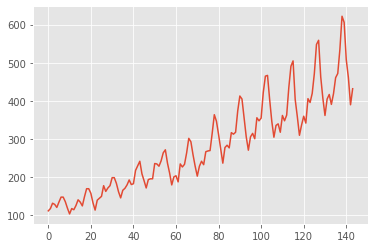

In [8]:
#  График, чтобы ответить на 4 вопроса
ser_g.iloc[:,1].plot()


In [0]:
#  Надо прогнозировать логарифм
ser_g['log_y'] = numpy.log10(ser_g['series_g'])

Text(0, 0.5, 'log10 от тысяч человек')

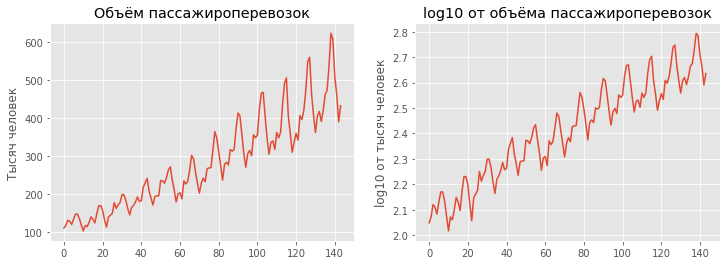

In [10]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [11]:
# Преобразуем данные

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))




        t-12      t-11      t-10  ...       t-2       t-1         t
0        NaN       NaN       NaN  ...       NaN       NaN  2.049218
1        NaN       NaN       NaN  ...       NaN  2.049218  2.071882
2        NaN       NaN       NaN  ...  2.049218  2.071882  2.120574
3        NaN       NaN       NaN  ...  2.071882  2.120574  2.110590
4        NaN       NaN       NaN  ...  2.120574  2.110590  2.082785
5        NaN       NaN       NaN  ...  2.110590  2.082785  2.130334
6        NaN       NaN       NaN  ...  2.082785  2.130334  2.170262
7        NaN       NaN       NaN  ...  2.130334  2.170262  2.170262
8        NaN       NaN       NaN  ...  2.170262  2.170262  2.133539
9        NaN       NaN       NaN  ...  2.170262  2.133539  2.075547
10       NaN       NaN  2.049218  ...  2.133539  2.075547  2.017033
11       NaN  2.049218  2.071882  ...  2.075547  2.017033  2.071882
12  2.049218  2.071882  2.120574  ...  2.017033  2.071882  2.060698

[13 rows x 13 columns]


In [12]:
#  Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [0]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

In [0]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [15]:
#  Все хорошо?
print(ser_g_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132, 13)
(120, 12)
(120,)
(12, 12)
(12,)


In [16]:
#  Все хорошо?
print(X_train.head(5))

        t-12      t-11      t-10  ...       t-3       t-2       t-1
12  2.049218  2.071882  2.120574  ...  2.075547  2.017033  2.071882
13  2.071882  2.120574  2.110590  ...  2.017033  2.071882  2.060698
14  2.120574  2.110590  2.082785  ...  2.071882  2.060698  2.100371
15  2.110590  2.082785  2.130334  ...  2.060698  2.100371  2.149219
16  2.082785  2.130334  2.170262  ...  2.100371  2.149219  2.130334

[5 rows x 12 columns]


In [0]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [18]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [19]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
120/120 [==============================] - 0s 2ms/step - loss: 1.1151 - mean_absolute_percentage_error: 43.6430
Epoch 2/300
120/120 [==============================] - 0s 76us/step - loss: 0.8454 - mean_absolute_percentage_error: 37.9517
Epoch 3/300
120/120 [==============================] - 0s 57us/step - loss: 0.6062 - mean_absolute_percentage_error: 32.1090
Epoch 4/300
120/120 [==============================] - 0s 56us/step - loss: 0.4101 - mean_absolute_percentage_error: 26.3572
Epoch 5/300
120/120 [==============================] - 0s 59us/step - loss: 0.2672 - mean_absolute_percentage_error: 21.2442
Epoch 6/300
120/120 [==============================] - 0s 58us/step - loss: 0.1651 - mean_absolute_percentage_error: 16.5902
Epoch 7/300
120/120 [==============================] - 0s 67us/step - loss: 0.0920 - mean_absolute_percentage_error: 12.2410
Epoch 8/300
120/120 [==============================] - 0s 64us/step - loss: 0.0440 - mean_absolute_percentage_error: 8.3201
Ep

In [20]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

12/12 [==============================] - 0s 1ms/step

MAPE: 1.67%


In [0]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [0]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [23]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(12, 12)
(12,)


In [0]:
#   было 144 наблюдений

#   отбросили 12 стало 132
#   train 120
#   test  12



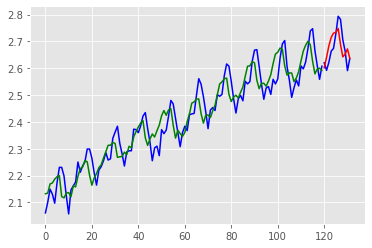

In [25]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = numpy.arange(0, 120, 1)

x3 = numpy.arange(120, 132, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



TORCH

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
X_train_tensor = torch.FloatTensor(np.asarray(X_train))
y_train_tensor = torch.FloatTensor(np.array(y_train))
X_test_tensor  = torch.FloatTensor(np.asarray(X_test))
y_test_tensor = torch.FloatTensor(np.array(y_test))

In [29]:
torch.manual_seed(42)
BATCH_SIZE = 15
EPOCH = 1200

x = X_train_tensor
y = y_train_tensor

x, y = Variable(x), Variable(y)

D_in, D_out = 12, 1

net = torch.nn.Sequential(
        torch.nn.Linear(D_in, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, D_out),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = torch.nn.MSELoss()

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, 
                        batch_size=BATCH_SIZE, 
                        shuffle=True, num_workers=2,)

for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)
        
        loss = loss_func(prediction, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [30]:
y_test_pred = net(X_test_tensor)

y_test_pred = y_test_pred.data.numpy()

mean_val = np.mean(np.abs((np.array(y_test) - y_test_pred) / np.array(y_test))) * 100

print("MAPE = " + str(mean_val)+"%")

MAPE = 10.061939022938612%
